# SESI 10 - Inferential Statistics
Nama : Syaima Radestya <br>
Kode Peserta : PYTN-KS10-011 <br>
Program : Introduction to Python for Data Science <br>

# Inferential Statistics
***
Inferential statistics yaitu mengambil data sebagai sampel dari populasi yang lebih besar untuk membuat kesimpulan. Tujuan utama dari metode ini adalah untuk menarik kesimpulan dari sampel dan menggeneralisasikannya untuk populasi yang lebih besar. Oleh karena itu, kita perlu mencari sampel sedemikian rupa sehingga dapat mencerminkan populasi dengan benar. Ada banyak cara untuk memilih sampel dari populasi, tetapi secara umum, pengambilan sampel secara acak memungkinkan kita untuk memiliki keyakinan bahwa sampel tersebut mewakili populasi.

**Why do we need inferential statistics?**
1. making inferences about a population from a sample
2. concluding whether a sample is significntly different from the population
3. if adding or removing a feature fromm a model will help in improving it
4. if one model is significantly different froom the other
5. hypothesis testing


### Probability Distribution
Probability Distribution adalah fungsi di bawah teori dan statistik probabilitas yang memberi kita seberapa besar kemungkinan hasil yang berbeda dalam sebuah eksperimen.
### Random Variable
Random Variable yaitu variabel yang kemungkinan nilainya merupakan hasil numerik dari fenomena acak. jenisnya ada diskrit dan kontinu. 
### Normal Distribution
Dikenal juga sebagai Gaussian distribution. Memiliki kurva kerapatan berbentuk lonceng yang dijelaskan dengan mean dan deviasi standarnya.
### Gamma Distribution
Gamma distribution adalah two-parameter family dari continous probability distributions.
### Exponential Distribution
Menggambarkan waktu antara peristiwa dalam Poisson point process.
### Poisson Distribution
Poisson random variabel biasanya digunakan untuk memodelkan beberapa kali suatu peristiwa terjadi dalam interval waktu.
### Binomial Distribution
Distribusi dimana hanya dua hasil yang mungkin, seperti sukses gagal, untung rugi, dan menang atau kalah.
### Bernoulli Distribution
Yaitu hanya memiliki dua kemungkinan hasil, yaitu 1 (berhasil) dan 0 (gagal), dan dalam sekali percobaan, misalnya, lemparan koin.



In [63]:
# import pustaka

# for inline plots in juppyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

## Uniform Distribution

In [64]:
# import uniform function dr scipy.stats.module
from scipy.stats import uniform

In [65]:
#random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

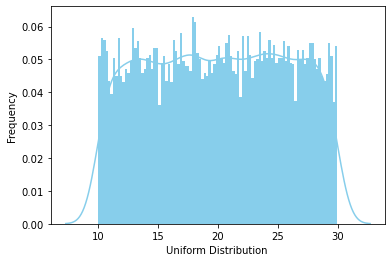

In [66]:
import seaborn as sns
#dapat menggunakan displot seaborn utk memplot histogram distribusi yg dibuat
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## Normal Distribution

In [67]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000, loc=0, scale=1)

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution '), Text(0, 0.5, 'Frequency')]

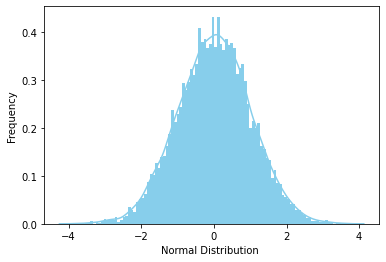

In [68]:
# visualisasi
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution ', ylabel='Frequency')

## Gamma Distribution

In [69]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Gamma Distribution '), Text(0, 0.5, 'Frequency')]

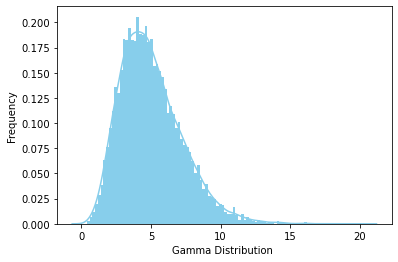

In [70]:
ax = sns.distplot(data_gamma,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution ', ylabel='Frequency')

In [71]:
# IMPORT LIBRARY
import numpy as np
import pandas as pd

In [72]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [73]:
df['sex'] = df.sex.replace({1: 'Male', 0: 'Female'})

In [74]:
# buat dataframe hanya dgn 2 kolom sex1 dan target dan drop semua nilai null
dx = df[['target', 'sex']].dropna()

In [75]:
#jumlah pria dan wanita penderita
pd.crosstab(dx.target, dx.sex)

sex,Female,Male
target,,
0,86,413
1,226,300


In [76]:
n = 86 + 226
p_fm = 226 / n
p_fm

0.7243589743589743

In [77]:
se_female = np.sqrt(p_fm * (1-p_fm) / n)
se_female

0.02529714756803247

In [78]:
z = 1.96
lb = p_fm - z * se_female
ub = p_fm + z * se_female
print (lb, ub)

0.6747765651256307 0.773941383592318


### Cl with mean

In [79]:
df.groupby("sex").agg({'chol':[np.mean, np.std, np.size]})

chol                
              mean        std size
sex                               
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [80]:
mean_fe = 261.455128
sd_fe = 64.466781
n = 312
z = 1.96

In [81]:
se = sd_fe / np.sqrt(n)

In [82]:
lb = mean_fe - z * se
ub = mean_fe + z * se
print (lb, ub)

254.30169095203016 268.6085650479699


### Hypotesis Testing

In [83]:
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv"
df = pd.read_csv(url)
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [84]:
males = df[df['RIAGENDR'] == 1]
females = df[df['RIAGENDR'] == 2]

In [85]:
nf = len(females)
muf = females.BMXBMI.mean()
stf = females.BMXBMI.std()

(nf, muf, stf)


(2976, 29.939945652173996, 7.75331880954568)

In [86]:
nm = len(males)
mum = males.BMXBMI.mean()
stm = males.BMXBMI.std()

(nm, mum, stm)

(2759, 28.778072111846985, 6.252567616801485)

In [87]:
import statsmodels.api as sm

sm.stats.ztest(females.BMXBMI.dropna(),
               males.BMXBMI.dropna(),
               alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)